<div align="center">
<h1>RoboAnalyzer Lab Assignment</h1>
<h5>Prasanth Kota -- IIT2019062
</div>

1. Perform the inverse kinematics of a 2R robot of any DH parameter combination, visualize the joint parameters and end effector positions (attach screenshots). Download joint value versus end effector position file from roboanalyzer. Deduce an analytical solution (Python or Matlab) and verify it using downloaded file.

- Inverse kinematics of a 2R Robot


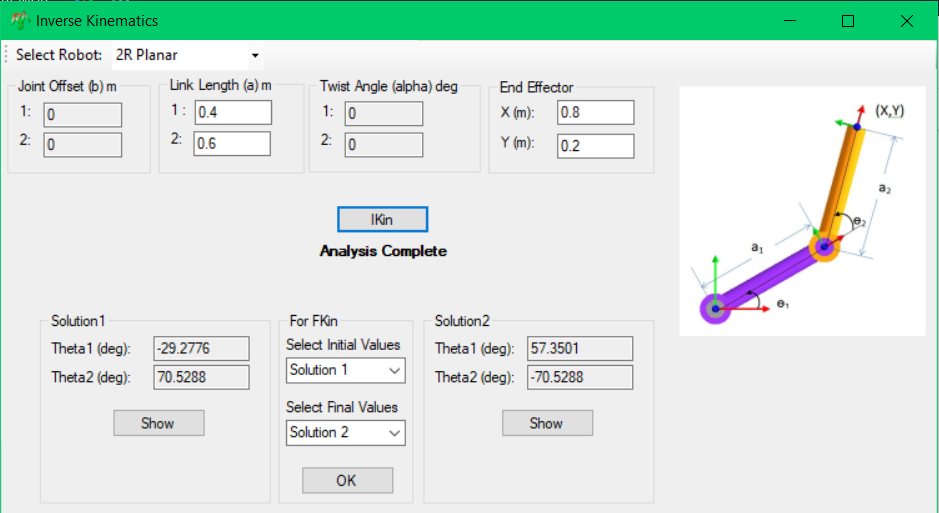

- Visualizing the Joint Parameters and End Effector  Positions

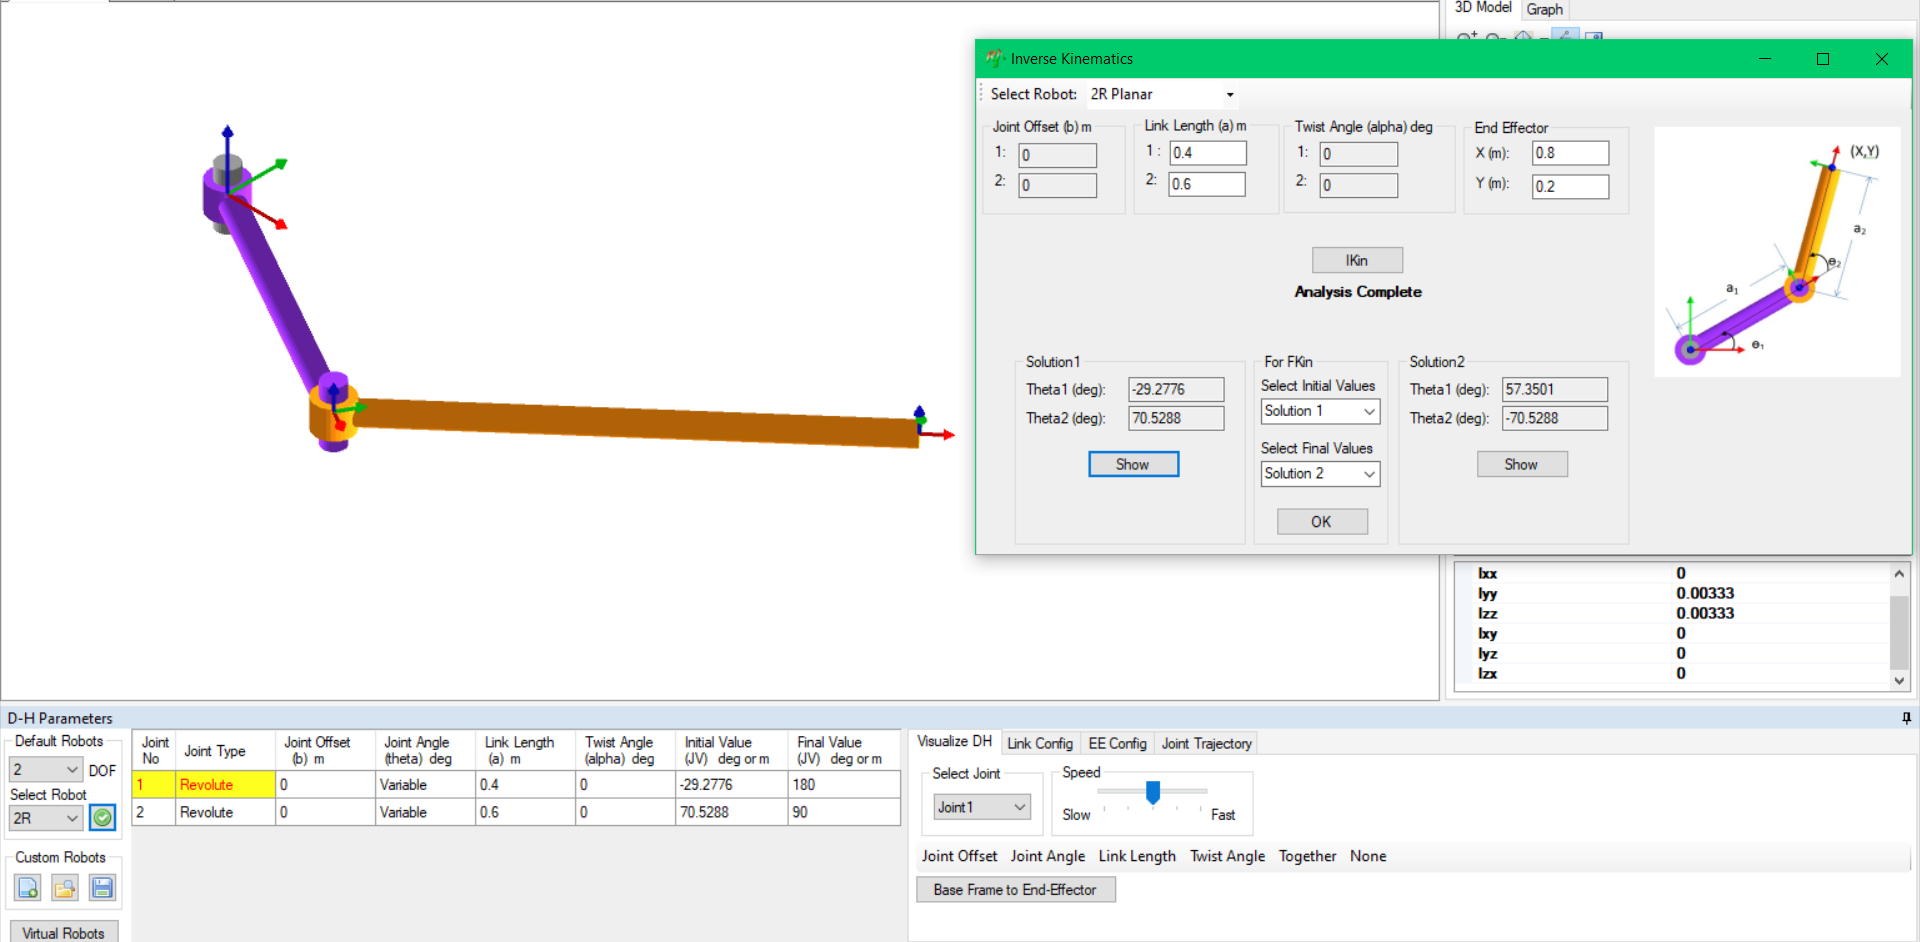

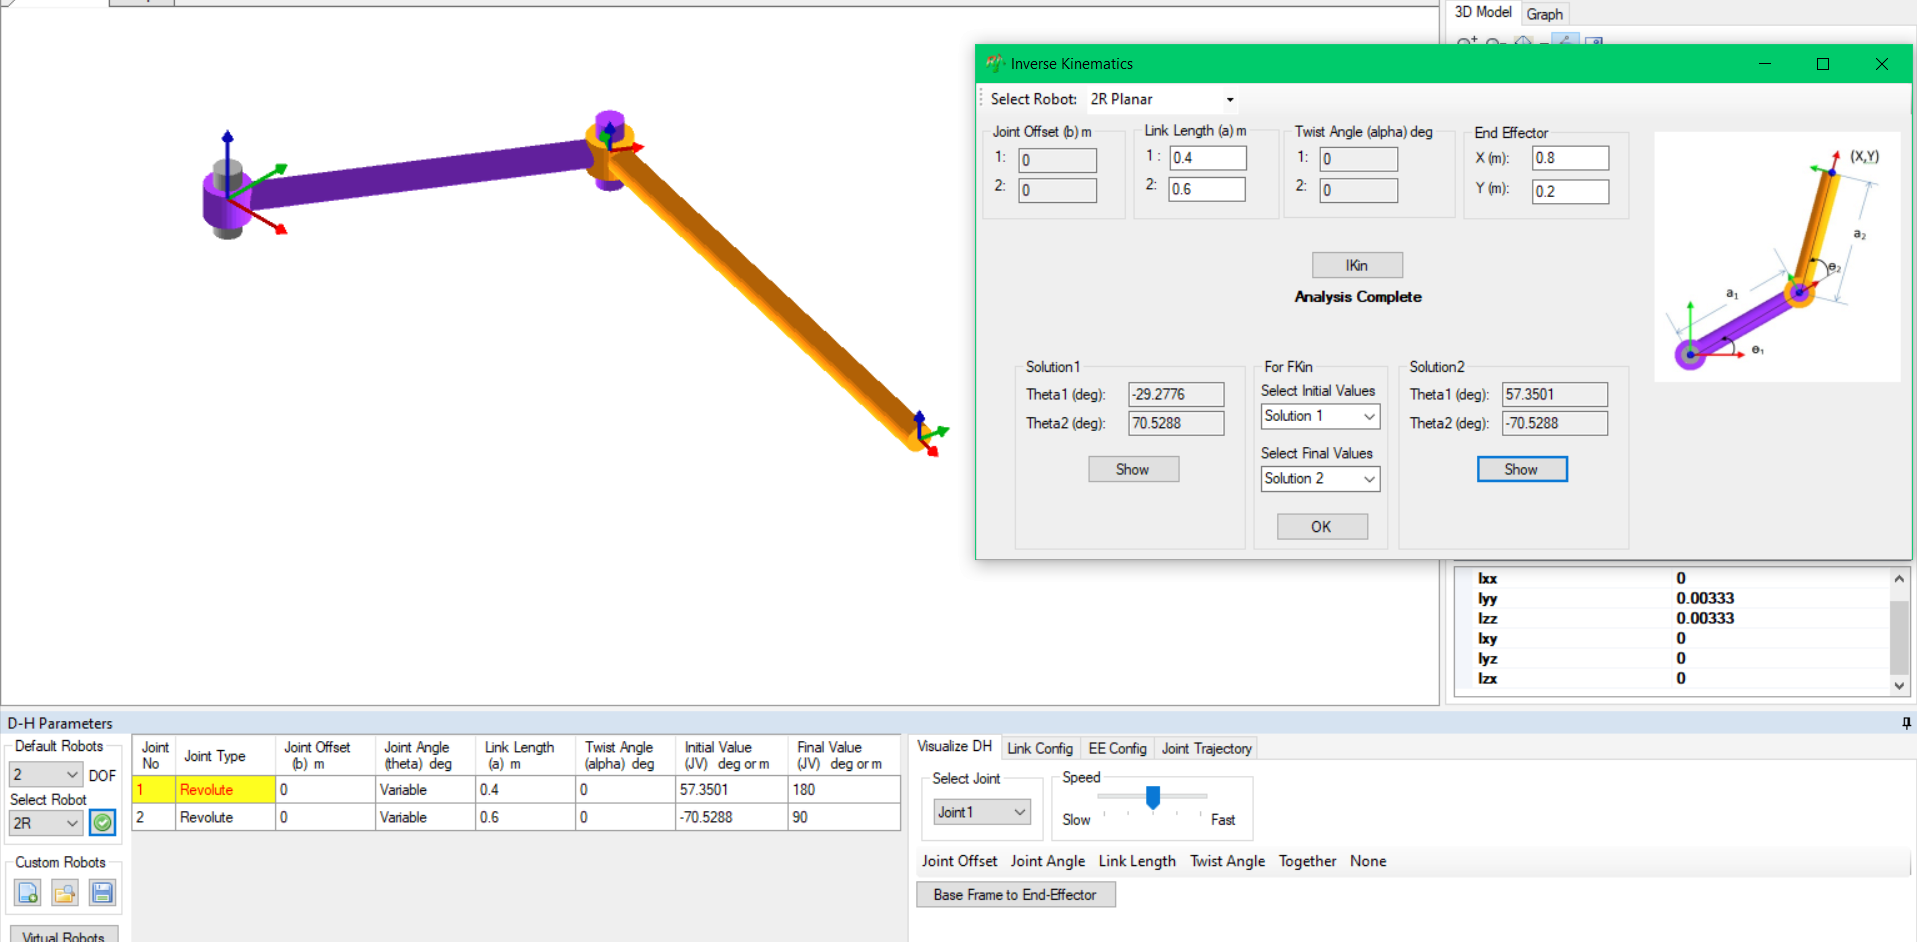

- Joint Value vs End Effector Position 

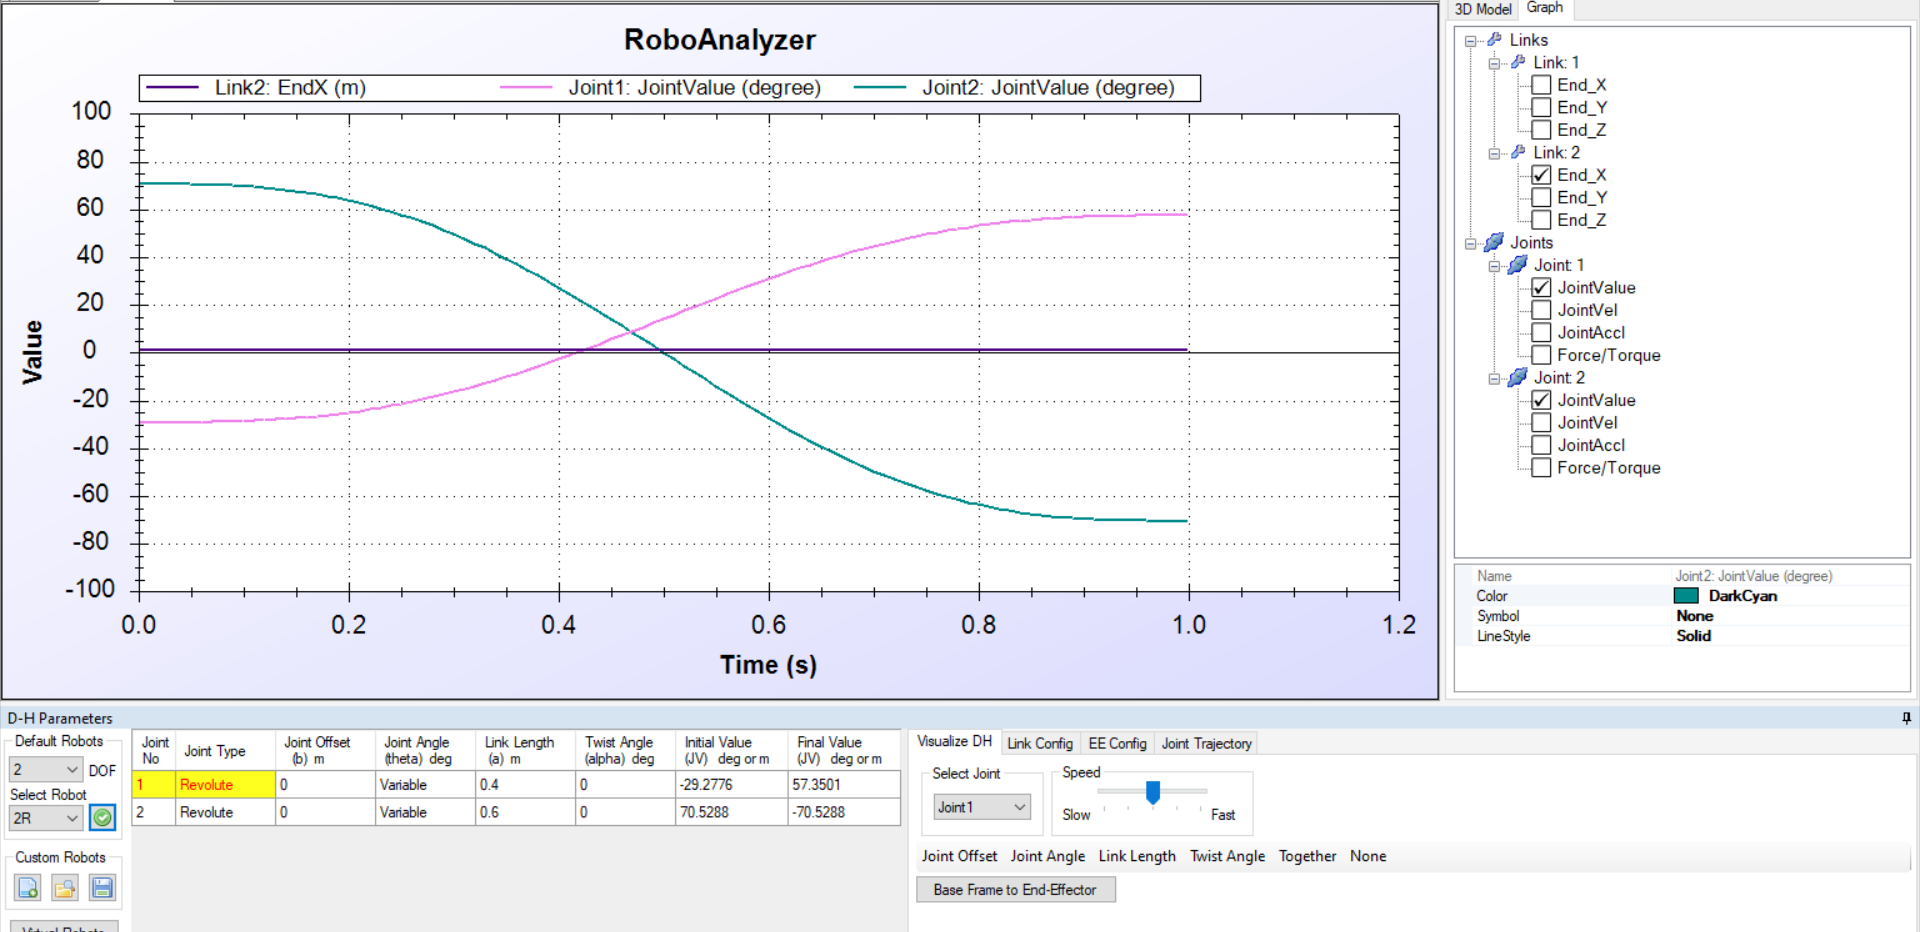

- joint value vs end effector position file

In [1]:
url = 'https://raw.githubusercontent.com/PK0TA/DATA/main/RIA/1.csv'

In [2]:
import pandas as pd
data = pd.read_csv(url)
data.head()

,frame,time,Link2: EndX (m),Joint1: JointValue (degree),Joint2: JointValue (degree),Unnamed: 5
0,1,0.00,0.800000,-29.277600,70.528800,NaN
1,2,0.01,0.800004,-29.277030,70.527872,NaN
2,3,0.02,0.800035,-29.273044,70.521381,NaN
3,4,0.03,0.800119,-29.262238,70.503785,NaN
4,5,0.04,0.800282,-29.241236,70.469588,NaN


- Analytical Solution for Inverse Kinematics

In [3]:
import math
r2d = 180/math.pi # convert radians to degrees
def inv_kinematics(x,y,l1,l2):
    c2 = (x*x+y*y-l1*l1-l2*l2)/(2*l1*l2)
    s2 = (1-c2*c2)**(1/2)
    theta21 = math.atan2(s2,c2)
    theta22 = math.atan2(-s2,c2)
    k1 = l1 + l2*c2
    k2 = l2*s2
    theta11 = math.atan2(y,x) - math.atan2(k2,k1)
    theta12 = math.atan2(y,x) - math.atan2(-k2,k1)
    return ((theta11*r2d,theta21*r2d),(theta12*r2d,theta22*r2d))

- verify joint value vs end effector for our modelled solution

In [4]:
sol1,sol2 = inv_kinematics(0.8,0.2,0.4,0.6)
print(sol1,sol2)

(-29.27761319035656, 70.5287793655093) (57.35010012620952, -70.5287793655093)


Which is same as that of the values obtained through roboanalyzer

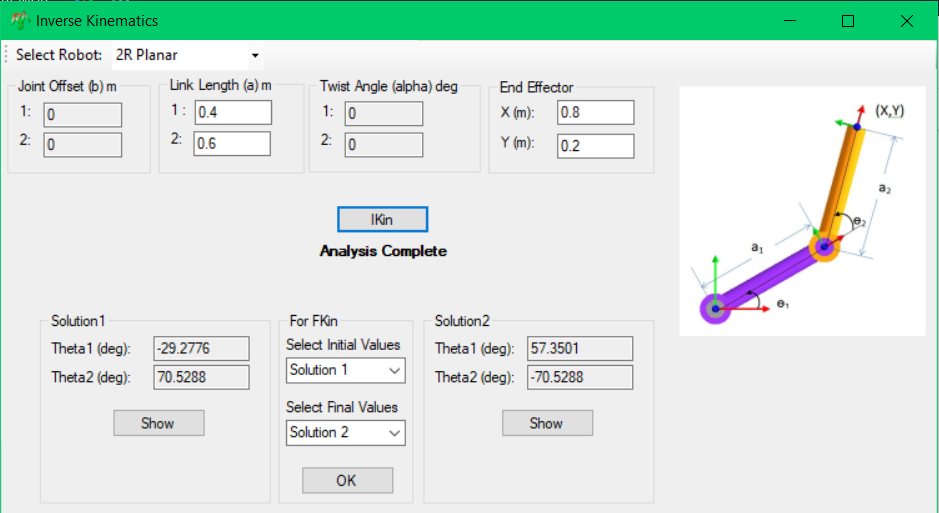

2. Perform the inverse dynamics for a 3R robot. Investigate the change in torque when the inertia properties and DH parameters are changed using Plots in Roboanalyzer. Change the input trajectory and observe the change. Write detailed observation using plots.

3. Solve inverse dynamics for a 2 DOF robot usind Roboanalyzer. Download joint versus motion parameters csv file and validate it using analytical method. Give an analysis for both results.